In [2]:
!pip install matplotlib

In [3]:
!pip install scikit-learn

In [4]:
!pip install kaggle --upgrade

In [5]:
!pip show kaggle

Name: kaggle
Version: 1.5.13
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: c:\users\user\.conda\envs\meta\lib\site-packages
Requires: certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


In [20]:
!kaggle datasets download -d frobert/handdrawn-shapes-hds-dataset


  0%|          | 0.00/57.7M [00:00<?, ?B/s]
  2%|1         | 1.00M/57.7M [00:00<00:43, 1.37MB/s]
  3%|3         | 2.00M/57.7M [00:00<00:21, 2.68MB/s]
  9%|8         | 5.00M/57.7M [00:01<00:07, 7.28MB/s]
 16%|#5        | 9.00M/57.7M [00:01<00:03, 13.3MB/s]
 23%|##2       | 13.0M/57.7M [00:01<00:02, 17.6MB/s]
 29%|##9       | 17.0M/57.7M [00:01<00:01, 22.0MB/s]
 36%|###6      | 21.0M/57.7M [00:01<00:01, 25.2MB/s]
 43%|####3     | 25.0M/57.7M [00:01<00:01, 27.5MB/s]
 49%|####8     | 28.0M/57.7M [00:01<00:01, 28.4MB/s]
 54%|#####3    | 31.0M/57.7M [00:01<00:01, 26.0MB/s]
 61%|######    | 35.0M/57.7M [00:02<00:00, 28.2MB/s]
 68%|######7   | 39.0M/57.7M [00:02<00:00, 29.8MB/s]
 75%|#######4  | 43.0M/57.7M [00:02<00:00, 30.0MB/s]
 81%|########1 | 47.0M/57.7M [00:02<00:00, 31.2MB/s]
 88%|########8 | 51.0M/57.7M [00:02<00:00, 31.4MB/s]
 95%|#########5| 55.0M/57.7M [00:02<00:00, 31.6MB/s]
100%|##########| 57.7M/57.7M [00:02<00:00, 21.8MB/s]


In [21]:
import shutil

filename = 'handdrawn-shapes-hds-dataset.zip'   # 압축해제할 파일 이름
extrac_dir = 'hds' # 압축해제할 폴더 이름
archive_format = 'zip' # 압축 파일 형태

shutil.unpack_archive(filename, extrac_dir, archive_format)

In [1]:
import os
import shutil
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse
from tensorflow.keras.utils import to_categorical

In [88]:
from distutils.dir_util import copy_tree

for temp in list(os.listdir('data')):
    path1 = os.getcwd() + '/data/' + temp + '/images'
    copy_tree(path1, os.getcwd())

In [16]:
shutil.copytree(os.getcwd() + '/ellipse', os.getcwd() + '/datas/ellipse')

'C:\\Users\\user\\meta\\hds/datas/ellipse'

In [18]:
for temp in ['/other', '/rectangle', '/triangle']:
    path = os.getcwd() + temp
    shutil.copytree(path, os.getcwd() + '/datas' + temp)

In [2]:
os.getcwd()

'C:\\Users\\user\\meta'

In [3]:
batch_size = 27292
img_height = 70
img_width = 70

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.getcwd() + '/hds/datas',
    validation_split = 0.2,
    color_mode = 'grayscale',
    subset = 'training',
    seed = 100,
    label_mode = 'categorical',
    image_size = (img_height, img_width),
    batch_size = batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.getcwd() + '/hds/datas',
    validation_split = 0.2,
    color_mode = 'grayscale',
    subset = 'validation',
    seed = 100,
    label_mode = 'categorical',
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 27292 files belonging to 4 classes.
Using 21834 files for training.
Found 27292 files belonging to 4 classes.
Using 5458 files for validation.


In [4]:
class_names = train_ds.class_names
print(class_names)

['ellipse', 'other', 'rectangle', 'triangle']


In [5]:
import matplotlib.pyplot as plt

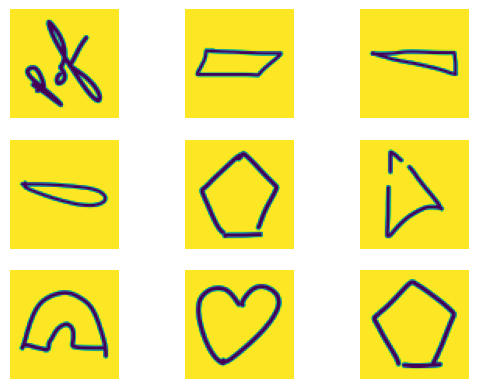

In [36]:
plt.figure()
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')

In [6]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)

(21834, 70, 70, 1)
(21834,)


In [7]:
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  print(labels_batch.shape)

(5458, 70, 70, 1)
(5458,)


In [8]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
X_train, y_train = next(iter(normalized_ds))

In [9]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
X_test, y_test = next(iter(normalized_ds))

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
# y, 즉 정답 데이터도 신경을 많이 써야한다. >> loss 함수 사용할 때의 문제!!
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
# model_v1: layer(5개), batch_size(512)
from tensorflow.keras.layers import Flatten

model_v1 = Sequential()
model_v1.add(Flatten(input_shape = (70, 70)))
model_v1.add(Dense(256, activation = 'relu'))
model_v1.add(Dense(128, activation = 'relu'))
model_v1.add(Dense(64, activation = 'relu'))
model_v1.add(Dense(32, activation = 'relu'))
model_v1.add(Dense(16, activation = 'relu'))
model_v1.add(Dense(4, activation = 'softmax'))

In [44]:
# label_mode = 'categorical'로 설정했기에 loss 함수를 설정할 때 주의해야한다.
model_v1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
history_v1 = model_v1.fit(X_train, y_train, epochs = 100, batch_size = 512)

Epoch 1/100
43/43 [==============================] - 1s 16ms/step - loss: 1.4315 - acc: 0.2532
Epoch 2/100
43/43 [==============================] - 0s 9ms/step - loss: 1.3824 - acc: 0.2737
Epoch 3/100
43/43 [==============================] - 0s 6ms/step - loss: 1.3745 - acc: 0.2899
Epoch 4/100
43/43 [==============================] - 0s 6ms/step - loss: 1.3648 - acc: 0.2993
Epoch 5/100
43/43 [==============================] - 0s 7ms/step - loss: 1.3489 - acc: 0.3172
Epoch 6/100
43/43 [==============================] - 0s 7ms/step - loss: 1.3349 - acc: 0.3263
Epoch 7/100
43/43 [==============================] - 0s 6ms/step - loss: 1.3182 - acc: 0.3449
Epoch 8/100
43/43 [==============================] - 0s 7ms/step - loss: 1.3045 - acc: 0.3451
Epoch 9/100
43/43 [==============================] - 0s 7ms/step - loss: 1.2705 - acc: 0.3621
Epoch 10/100
43/43 [==============================] - 0s 7ms/step - loss: 1.2341 - acc: 0.4110
Epoch 11/100
43/43 [==============================] - 0s 7

In [45]:
model_v1.evaluate(X_test, y_test)

171/171 [==============================] - 1s 4ms/step - loss: 0.4688 - acc: 0.8435


[0.46879276633262634, 0.8435324430465698]

In [46]:
pred = model_v1.predict(X_test)
pred.argmax(axis = 1)

171/171 [==============================] - 1s 3ms/step


array([2, 1, 0, ..., 2, 3, 1], dtype=int64)

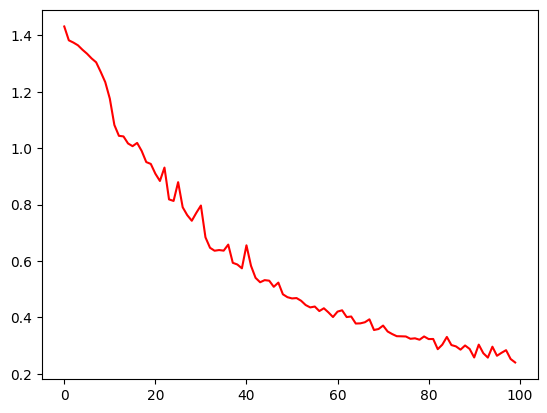

In [47]:
loss = history_v1.history['loss']
plt.plot(range(len(loss)), loss, color = 'r', label = 'train_loss')

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(np.argmax(y_test, axis = 1), pred.argmax(axis = 1))

array([[1031,   95,  115,   72],
       [  27, 1213,   67,  105],
       [  65,   73, 1142,  123],
       [  14,   57,   41, 1218]], dtype=int64)

In [13]:
# model_v2: layer(4개), batch_size(256)
from tensorflow.keras.layers import Flatten

model_v2 = Sequential()
model_v2.add(Flatten(input_shape = (70, 70)))
model_v2.add(Dense(128, activation = 'relu'))
model_v2.add(Dense(64, activation = 'relu'))
model_v2.add(Dense(32, activation = 'relu'))
model_v2.add(Dense(16, activation = 'relu'))
model_v2.add(Dense(4, activation = 'softmax'))

In [15]:
model_v2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
history_v2 = model_v2.fit(X_train, y_train, epochs = 100, batch_size = 256)

Epoch 1/100
86/86 [==============================] - 5s 9ms/step - loss: 1.3659 - acc: 0.3087
Epoch 2/100
86/86 [==============================] - 1s 8ms/step - loss: 1.2435 - acc: 0.4170
Epoch 3/100
86/86 [==============================] - 1s 8ms/step - loss: 1.1022 - acc: 0.5201
Epoch 4/100
86/86 [==============================] - 1s 8ms/step - loss: 1.0261 - acc: 0.5735
Epoch 5/100
86/86 [==============================] - 1s 8ms/step - loss: 0.9192 - acc: 0.6454
Epoch 6/100
86/86 [==============================] - 1s 9ms/step - loss: 0.8793 - acc: 0.6615
Epoch 7/100
86/86 [==============================] - 1s 8ms/step - loss: 0.8557 - acc: 0.6741
Epoch 8/100
86/86 [==============================] - 1s 9ms/step - loss: 0.8175 - acc: 0.6904
Epoch 9/100
86/86 [==============================] - 1s 9ms/step - loss: 0.7884 - acc: 0.7074
Epoch 10/100
86/86 [==============================] - 1s 9ms/step - loss: 0.8023 - acc: 0.6989
Epoch 11/100
86/86 [==============================] - 1s 8m

In [16]:
model_v2.evaluate(X_test, y_test)

171/171 [==============================] - 1s 6ms/step - loss: 0.4644 - acc: 0.8501


[0.4643666446208954, 0.8501282334327698]

In [17]:
pred_v2 = model_v2.predict(X_test)
pred_v2.argmax(axis = 1)

171/171 [==============================] - 1s 3ms/step


array([2, 1, 0, ..., 2, 3, 1], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(np.argmax(y_test, axis = 1), pred_v2.argmax(axis = 1))

array([[1101,   46,  138,   28],
       [  69, 1120,  116,  107],
       [  76,   21, 1252,   54],
       [  40,   33,   90, 1167]], dtype=int64)

In [19]:
# model_v3: layer(4개), batch_size(512)
from tensorflow.keras.layers import Flatten

model_v3 = Sequential()
model_v3.add(Flatten(input_shape = (70, 70)))
model_v3.add(Dense(256, activation = 'relu'))
model_v3.add(Dense(128, activation = 'relu'))
model_v3.add(Dense(64, activation = 'relu'))
model_v3.add(Dense(32, activation = 'relu'))
model_v3.add(Dense(4, activation = 'softmax'))

In [20]:
model_v3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
history_v3 = model_v3.fit(X_train, y_train, epochs = 100, batch_size = 512)

Epoch 1/100
43/43 [==============================] - 1s 17ms/step - loss: 1.6745 - acc: 0.2787
Epoch 2/100
43/43 [==============================] - 1s 16ms/step - loss: 1.2856 - acc: 0.4290
Epoch 3/100
43/43 [==============================] - 1s 16ms/step - loss: 1.1982 - acc: 0.4665
Epoch 4/100
43/43 [==============================] - 1s 15ms/step - loss: 1.1243 - acc: 0.4965
Epoch 5/100
43/43 [==============================] - 1s 13ms/step - loss: 1.0467 - acc: 0.5596
Epoch 6/100
43/43 [==============================] - 1s 12ms/step - loss: 1.0007 - acc: 0.6007
Epoch 7/100
43/43 [==============================] - 1s 13ms/step - loss: 0.9623 - acc: 0.6268
Epoch 8/100
43/43 [==============================] - 1s 12ms/step - loss: 0.9480 - acc: 0.6227
Epoch 9/100
43/43 [==============================] - 1s 13ms/step - loss: 0.9000 - acc: 0.6595
Epoch 10/100
43/43 [==============================] - 1s 13ms/step - loss: 0.8752 - acc: 0.6658
Epoch 11/100
43/43 [=============================

In [21]:
model_v3.evaluate(X_test, y_test)

171/171 [==============================] - 1s 7ms/step - loss: 0.5054 - acc: 0.8415


[0.5053597688674927, 0.8415170311927795]

In [26]:
# model_v4: layer(5개), batch_size(256)
from tensorflow.keras.layers import Flatten

model_v4 = Sequential()
model_v4.add(Flatten(input_shape = (70, 70)))
model_v4.add(Dense(128, activation = 'relu'))
model_v4.add(Dense(96, activation = 'relu'))
model_v4.add(Dense(64, activation = 'relu'))
model_v4.add(Dense(32, activation = 'relu'))
model_v4.add(Dense(16, activation = 'relu'))
model_v4.add(Dense(4, activation = 'softmax'))

In [27]:
model_v4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
history_v4 = model_v4.fit(X_train, y_train, epochs = 100, batch_size = 256)

Epoch 1/100
86/86 [==============================] - 2s 13ms/step - loss: 1.3991 - acc: 0.3244
Epoch 2/100
86/86 [==============================] - 1s 11ms/step - loss: 1.2048 - acc: 0.4521
Epoch 3/100
86/86 [==============================] - 1s 10ms/step - loss: 1.0805 - acc: 0.5374
Epoch 4/100
86/86 [==============================] - 1s 9ms/step - loss: 0.9897 - acc: 0.5943
Epoch 5/100
86/86 [==============================] - 1s 9ms/step - loss: 0.9118 - acc: 0.6366
Epoch 6/100
86/86 [==============================] - 1s 9ms/step - loss: 0.8541 - acc: 0.6667
Epoch 7/100
86/86 [==============================] - 1s 9ms/step - loss: 0.8594 - acc: 0.6642
Epoch 8/100
86/86 [==============================] - 1s 11ms/step - loss: 0.7801 - acc: 0.6930
Epoch 9/100
86/86 [==============================] - 1s 10ms/step - loss: 0.8108 - acc: 0.6812
Epoch 10/100
86/86 [==============================] - 1s 10ms/step - loss: 0.6961 - acc: 0.7347
Epoch 11/100
86/86 [==============================] -

In [28]:
model_v4.evaluate(X_test, y_test)

171/171 [==============================] - 1s 5ms/step - loss: 0.5848 - acc: 0.8256


[0.5848352909088135, 0.8255771398544312]

In [32]:
# model_v5: layer(4개), batch_size(128)
from tensorflow.keras.layers import Flatten

model_v5 = Sequential()
model_v5.add(Flatten(input_shape = (70, 70)))
model_v5.add(Dense(128, activation = 'relu'))
model_v5.add(Dense(64, activation = 'relu'))
model_v5.add(Dense(32, activation = 'relu'))
model_v5.add(Dense(16, activation = 'relu'))
model_v5.add(Dense(4, activation = 'softmax'))

In [33]:
model_v5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
history_v5 = model_v5.fit(X_train, y_train, epochs = 100, batch_size = 128)

Epoch 1/100
171/171 [==============================] - 2s 9ms/step - loss: 1.3225 - acc: 0.3643
Epoch 2/100
171/171 [==============================] - 1s 8ms/step - loss: 1.1199 - acc: 0.5342
Epoch 3/100
171/171 [==============================] - 1s 8ms/step - loss: 0.9832 - acc: 0.6135
Epoch 4/100
171/171 [==============================] - 1s 7ms/step - loss: 0.9283 - acc: 0.6366
Epoch 5/100
171/171 [==============================] - 1s 7ms/step - loss: 0.8574 - acc: 0.6749
Epoch 6/100
171/171 [==============================] - 1s 7ms/step - loss: 0.8248 - acc: 0.6821
Epoch 7/100
171/171 [==============================] - 1s 7ms/step - loss: 0.7577 - acc: 0.7143
Epoch 8/100
171/171 [==============================] - 1s 7ms/step - loss: 0.7593 - acc: 0.7131
Epoch 9/100
171/171 [==============================] - 1s 7ms/step - loss: 0.7364 - acc: 0.7205
Epoch 10/100
171/171 [==============================] - 1s 7ms/step - loss: 0.6897 - acc: 0.7396
Epoch 11/100
171/171 [=================

In [34]:
model_v5.evaluate(X_test, y_test)

171/171 [==============================] - 1s 5ms/step - loss: 0.5193 - acc: 0.8412


[0.5193257331848145, 0.8411505818367004]

In [37]:
# model_v6: layer(4개), batch_size(256)
from tensorflow.keras.layers import Flatten

model_v6 = Sequential()
model_v6.add(Flatten(input_shape = (70, 70)))
model_v6.add(Dense(192, activation = 'relu'))
model_v6.add(Dense(96, activation = 'relu'))
model_v6.add(Dense(48, activation = 'relu'))
model_v6.add(Dense(16, activation = 'relu'))
model_v6.add(Dense(4, activation = 'softmax'))

In [38]:
model_v6.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
history_v6 = model_v6.fit(X_train, y_train, epochs = 100, batch_size = 256)

Epoch 1/100
86/86 [==============================] - 2s 13ms/step - loss: 1.4382 - acc: 0.3306
Epoch 2/100
86/86 [==============================] - 1s 12ms/step - loss: 1.1457 - acc: 0.5011
Epoch 3/100
86/86 [==============================] - 1s 11ms/step - loss: 1.0427 - acc: 0.5799
Epoch 4/100
86/86 [==============================] - 1s 9ms/step - loss: 0.9651 - acc: 0.6239
Epoch 5/100
86/86 [==============================] - 1s 9ms/step - loss: 0.9304 - acc: 0.6475
Epoch 6/100
86/86 [==============================] - 1s 10ms/step - loss: 0.8881 - acc: 0.6673
Epoch 7/100
86/86 [==============================] - 1s 9ms/step - loss: 0.8656 - acc: 0.6727
Epoch 8/100
86/86 [==============================] - 1s 8ms/step - loss: 0.8109 - acc: 0.6989
Epoch 9/100
86/86 [==============================] - 1s 9ms/step - loss: 0.7975 - acc: 0.7025
Epoch 10/100
86/86 [==============================] - 1s 10ms/step - loss: 0.7612 - acc: 0.7156
Epoch 11/100
86/86 [==============================] - 

In [39]:
model_v6.evaluate(X_test, y_test)

171/171 [==============================] - 1s 4ms/step - loss: 0.4908 - acc: 0.8481


[0.49078184366226196, 0.8481128811836243]

In [41]:
# model_v7: layer(4개), batch_size(256), epoch(200)
from tensorflow.keras.layers import Flatten

model_v7 = Sequential()
model_v7.add(Flatten(input_shape = (70, 70)))
model_v7.add(Dense(128, activation = 'relu'))
model_v7.add(Dense(64, activation = 'relu'))
model_v7.add(Dense(32, activation = 'relu'))
model_v7.add(Dense(16, activation = 'relu'))
model_v7.add(Dense(4, activation = 'softmax'))

In [42]:
model_v7.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
history_v7 = model_v7.fit(X_train, y_train, epochs = 200, batch_size = 256)

Epoch 1/200
86/86 [==============================] - 2s 11ms/step - loss: 1.3604 - acc: 0.3177
Epoch 2/200
86/86 [==============================] - 1s 9ms/step - loss: 1.2412 - acc: 0.4289
Epoch 3/200
86/86 [==============================] - 1s 11ms/step - loss: 1.1670 - acc: 0.4861
Epoch 4/200
86/86 [==============================] - 1s 11ms/step - loss: 1.0733 - acc: 0.5440
Epoch 5/200
86/86 [==============================] - 1s 8ms/step - loss: 1.0023 - acc: 0.5892
Epoch 6/200
86/86 [==============================] - 1s 9ms/step - loss: 0.9168 - acc: 0.6426
Epoch 7/200
86/86 [==============================] - 1s 8ms/step - loss: 0.9023 - acc: 0.6429
Epoch 8/200
86/86 [==============================] - 1s 8ms/step - loss: 0.8421 - acc: 0.6798
Epoch 9/200
86/86 [==============================] - 1s 8ms/step - loss: 0.8220 - acc: 0.6911
Epoch 10/200
86/86 [==============================] - 1s 8ms/step - loss: 0.7876 - acc: 0.7023
Epoch 11/200
86/86 [==============================] - 1s

86/86 [==============================] - 1s 9ms/step - loss: 0.1207 - acc: 0.9546
Epoch 172/200
86/86 [==============================] - 1s 9ms/step - loss: 0.1376 - acc: 0.9508
Epoch 173/200
86/86 [==============================] - 1s 9ms/step - loss: 0.1100 - acc: 0.9591
Epoch 174/200
86/86 [==============================] - 1s 9ms/step - loss: 0.1076 - acc: 0.9613
Epoch 175/200
86/86 [==============================] - 1s 9ms/step - loss: 0.0784 - acc: 0.9728
Epoch 176/200
86/86 [==============================] - 1s 9ms/step - loss: 0.0750 - acc: 0.9736
Epoch 177/200
86/86 [==============================] - 1s 9ms/step - loss: 0.0829 - acc: 0.9711
Epoch 178/200
86/86 [==============================] - 1s 9ms/step - loss: 0.0912 - acc: 0.9681
Epoch 179/200
86/86 [==============================] - 1s 9ms/step - loss: 0.0979 - acc: 0.9643
Epoch 180/200
86/86 [==============================] - 1s 9ms/step - loss: 0.1106 - acc: 0.9591
Epoch 181/200
86/86 [==============================] -

In [43]:
model_v7.evaluate(X_test, y_test)

171/171 [==============================] - 1s 5ms/step - loss: 0.6783 - acc: 0.8538


[0.6782817244529724, 0.8537926077842712]